<a href="https://colab.research.google.com/github/BAlshowaikh/ML-Projects/blob/main/Neural_Network_Classification_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to TensorFlow Classification problem
#### These are lectures from 70 to

In [ ]:
1e-2

0.01

### There are 3 types of classisfication problem
1. Binary problem ( Is this email consider as spam or not spam? )
2. Multiclass classification ( Is this picture a rice, fish or lettuce? )
3. Multilable classification ( What are other keywords that are associated with Machine learning when googling it? )

# Binary Classification Problem

### Create data and visualize it

In [ ]:
# Import the library
from sklearn.datasets import make_circles
# Make 1000 examples
n_samples = 1000
# Create circles - Ctrl + space + Shift for more info -
X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state = 42)


In [ ]:
# Check the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the lables - The last 10 for shortness -
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
# Visualize the data
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "lable":y})
circles

X0        X1  lable
0    0.754246  0.231481      1
1   -0.756159  0.153259      1
2   -0.815392  0.173282      1
3   -0.393731  0.692883      1
4    0.442208 -0.896723      0
..        ...       ...    ...
995  0.244054  0.944125      0
996 -0.978655 -0.272373      0
997 -0.136900 -0.810012      1
998  0.670362 -0.767502      0
999  0.281057  0.963824      0

[1000 rows x 3 columns]

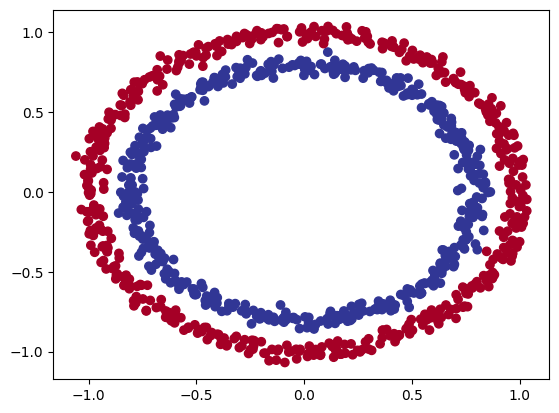

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

# Steps in modelling
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate and tweak

### Create, compile and fit a model with 1 hidden layer

In [ ]:
# Import tensorflow
import tensorflow as tf

# Set a random seed
tf.random.set_seed(42)

# 1.Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2.Compile the model -NOTE: We use BinaryCrossentropy because we're working with a binary problem, it may vary form a problem to another
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.SGD(),
                metrics= ["accuracy"])

# 3.Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 4.7798 - accuracy: 0.4850
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 3.8001 - accuracy: 0.4700
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 1.0498 - accuracy: 0.5020
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7190 - accuracy: 0.4990
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7014 - accuracy: 0.4930


### Evaluate the model

In [ ]:
model_1.evaluate(X, y) # NOTE: It's not ideal to fit and evaulate the same set of data

32/32 [==============================] - 0s 1ms/step - loss: 0.6979 - accuracy: 0.5030


[0.6979168653488159, 0.503000020980835]

### Create another improved model with 2 layers and 100 epchos

In [ ]:
tf.random.set_seed(42)

# 1.Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2.Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3.Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

### Evaluate model_2

In [ ]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933269500732422, 0.5]

# Improve the model

Ways to improve our model

1. Create a model - we might add more hidden layers or increase the number of hidden units within a layer or change the activation function.

2. Compiling the model - Change the optimizer function

3. Fitting the model - we can fit the model into more epochs (Let it train for a longer time)

### Model_3 - Increase the number of hidden units and add extra layer

In [ ]:
# Set a random seed
tf.random.set_seed(42)

# 1. Create a model (3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3.Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

### Evaluate model_3

In [ ]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.5000


[0.6939812302589417, 0.5]

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, None, 100)         200       
                                                                 
 dense_4 (Dense)             (None, None, 10)          1010      
                                                                 
 dense_5 (Dense)             (None, None, 1)           11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


# Visualize the model's predictions

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  # define the axis boundaries of the polt and create a meshgrid
  x_min, x_max =X[:, 0].min() - 0.1 , X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1,  X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                      np.linspace(y_min, y_max, 100))
  # Create X values
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # Make predictions
  y_pred = model.predict(x_in)

  # Check if it's multicalss or not
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape the prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the desicion boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing multiclass classification


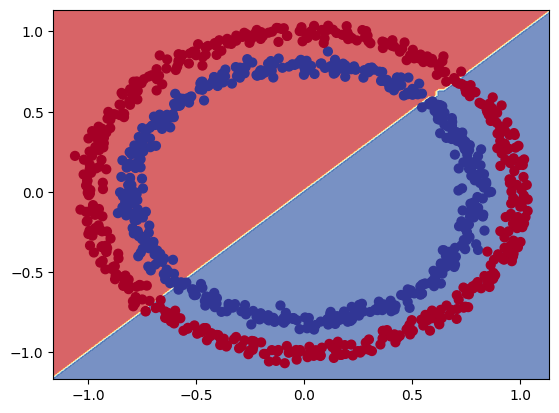

In [ ]:
# Check out the predictions of the model
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

### Feedback on our model's prediction

 Our model is performing as it has a regression problem not a classification, that can be seen from the straight line it draws.

# Use the previous model for a regression problem

In [ ]:
# Set a random seed
tf.random.set_seed(42)

# Create a regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # The relationship is y = X + 100

# Split the data into training and testing sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100, verbose=0) #  NOTE: you have to expand dims to not get an error

### NOTE: We'll recreate model_3 to fit for a regression problem

In [ ]:
# Set a random seed
tf.random.set_seed(42)

# Create a model
model_3_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3_reg.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae"])

# Fit the model
model_3_reg.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 11ms/step - loss: 429.9703 - mae: 429.9703
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 297.7106 - mae: 297.7106
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 170.1134 - mae: 170.1134
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 55.3988 - mae: 55.3988
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 81.0169 - mae: 81.0169
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 83.1132 - mae: 83.1132
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 49.5647 - mae: 49.5647
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 54.5566 - mae: 54.5566
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 47.9890 - mae: 47.9890
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 46.8227 - mae: 46.8227
Epoch 11/100
5/5 [==============================] - 

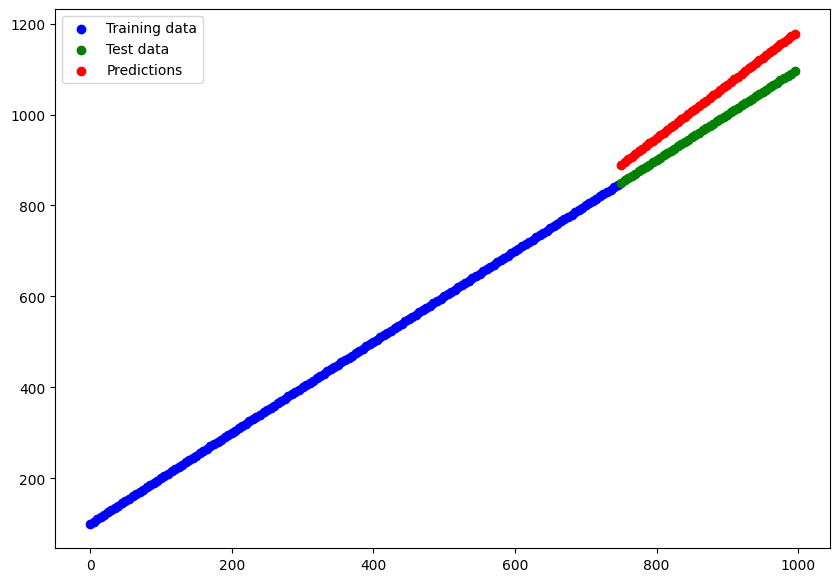

In [ ]:
# Make some predictions
y_reg_preds = model_3_reg(X_reg_test)

# Plot the predictions
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

# The missing piece: Non-linearity

### Create a new model with a **linear activation** (Any activation rather than "Linear")

In [ ]:
# Set a random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics="accuracy")

# 3.Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.1067 - accuracy: 0.4890
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0860 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 6.0699 - accuracy: 0.4870
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 6.0565 - accuracy: 0.4880
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 6.0433 - accuracy: 0.4840
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0193 - accuracy: 0.4840
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9938 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9624 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9254 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9225 - accuracy: 0.4840
Epoch 11/

### Check the predictions (decision boundary) for our latest model (model_4)

313/313 [==============================] - 0s 1ms/step
Doing binary classification


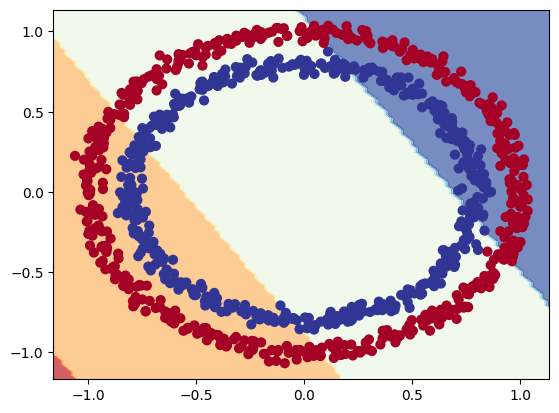

In [ ]:
plot_decision_boundary(model=model_4,
                      X=X,
                      y=y)

### Create a new model with a **non - linear activation** (Any activation rather than "Linear")

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics="accuracy")

# 3.Fit the model
model_5.fit(X, y, epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.1913 - accuracy: 0.4810
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.9761 - accuracy: 0.4790
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.7289 - accuracy: 0.4780
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5892 - accuracy: 0.4760
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5343 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5087 - accuracy: 0.4740
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5004 - accuracy: 0.4750
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4935 - accuracy: 0.4730
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4868 - accuracy: 0.4740
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4815 - accuracy: 0.4760
Epoch 11/

### As the [TensorFlow play ground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.88266&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) link shows, it's time to convert the play ground into code!

### Create a model with more than one layer


In [ ]:
# Set a random seed
tf.random.set_seed(42)

# 1. Create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics="accuracy")

# 3.Fit the model
model_6.fit(X, y, epochs=100)


Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 5.4884 - accuracy: 0.2850
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 5.3571 - accuracy: 0.2820
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 5.2496 - accuracy: 0.2820
Epoch 4/100
32/32 [==============================] - 0s 8ms/step - loss: 5.1729 - accuracy: 0.2780
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 5.1213 - accuracy: 0.2800
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 5.0271 - accuracy: 0.2830
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.9503 - accuracy: 0.2880
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.8870 - accuracy: 0.2890
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.8252 - accuracy: 0.2940
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.7534 - accuracy: 0.2960
Epoch 11/

#### Maybe the previous model is performing bad beacuse we want the output layers be just one value not four, so change the output hidden layers to 1

### Create a new model with one hidden neuron output and set a non-linear activation

In [ ]:
# Set a random seed
tf.random.set_seed(42)

# 1. Create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics="accuracy")

# 3.Fit the model
history = model_6.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 3s 7ms/step - loss: 0.7117 - accuracy: 0.4890
Epoch 2/200
32/32 [==============================] - 0s 5ms/step - loss: 0.7056 - accuracy: 0.4930
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7021 - accuracy: 0.4910
Epoch 4/200
32/32 [==============================] - 0s 4ms/step - loss: 0.7001 - accuracy: 0.4900
Epoch 5/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6990 - accuracy: 0.4870
Epoch 6/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6982 - accuracy: 0.4830
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.4820
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.4650
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.4550
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.4650
Epoch 11/

### Evalute model_6 (Best model so far)

In [ ]:
model_6.evaluate(X, y)

32/32 [==============================] - 1s 3ms/step - loss: 0.5653 - accuracy: 0.6840


[0.5653430819511414, 0.6840000152587891]

### Check the predictions (decision boundary) for our latest model (model_6)

313/313 [==============================] - 1s 3ms/step
Doing binary classification


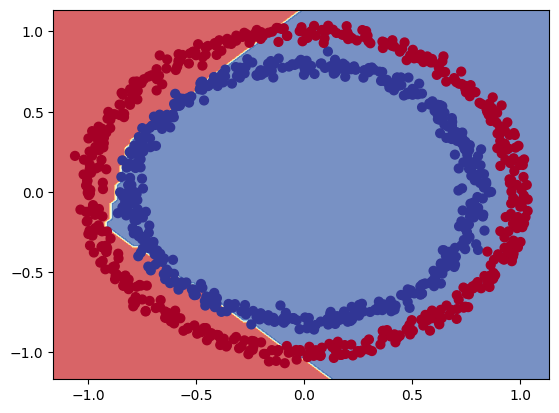

In [ ]:
plot_decision_boundary(model=model_6,
                       X=X,
                       y=y)

# Take a closer look at the activation functions

In [ ]:
# Craete a toy tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

### **linear** activation function | linear

####  Basically it returns the input as it's without any changes

In [ ]:
# Try the linear activation function with out toy tensor A
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

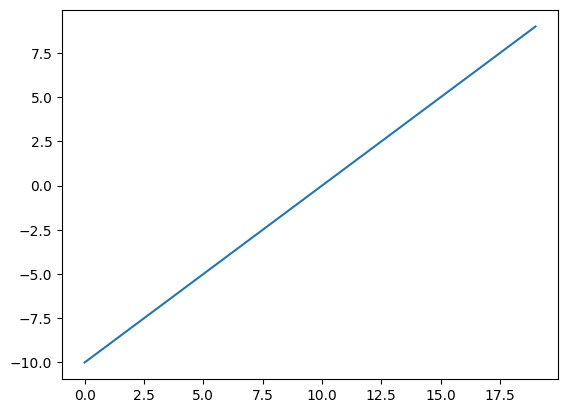

In [ ]:
# Plot the toy tensor
plt.plot(A)

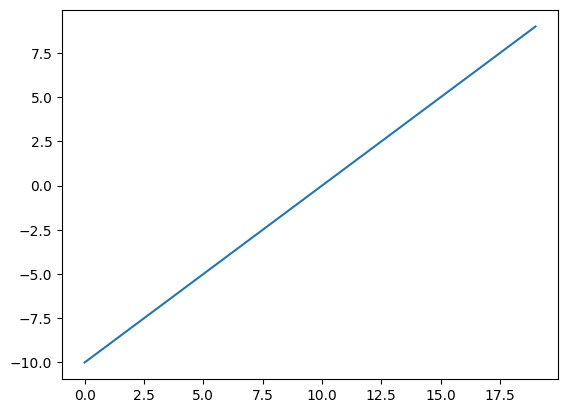

In [ ]:
# Plot the toy tensor after adding the linear function
plt.plot(tf.keras.activations.linear(A))

### **sigmoid** activation function | non-linear

#### The equation of this tensor is sigmoid(x) = 1 / (1 + exp(-x))

In [ ]:
# Define a function for sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function with the toy tensor A
sigmoid(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

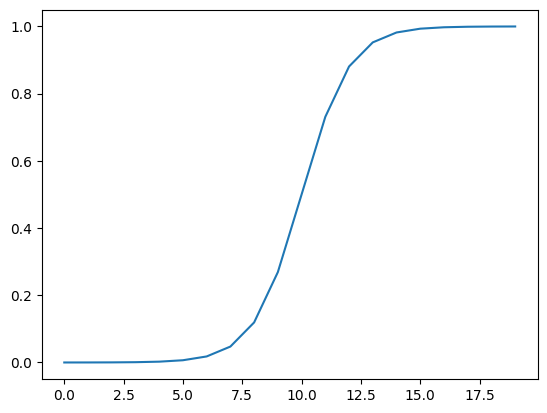

In [ ]:
# Plot the toy tensor after adding the sigmoid function
plt.plot(sigmoid(A))

### **relu** activation function | non-linear

#### It just convert all negative numbers to zeros, while other numbers remind the same

In [ ]:
# Define a function for relu
def relu(x):
  return tf.maximum(0, x)


# Use the relu function in the toy tensor
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

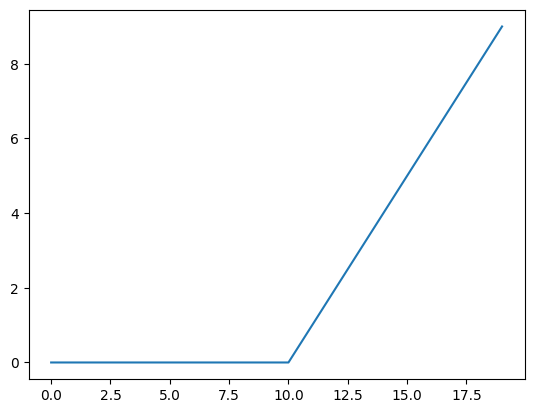

In [ ]:
# Plot the toy tensor after adding a relu activation
plt.plot(relu(A))

### Summarization of the three types of activation functions (linear, sigmoid, relu)

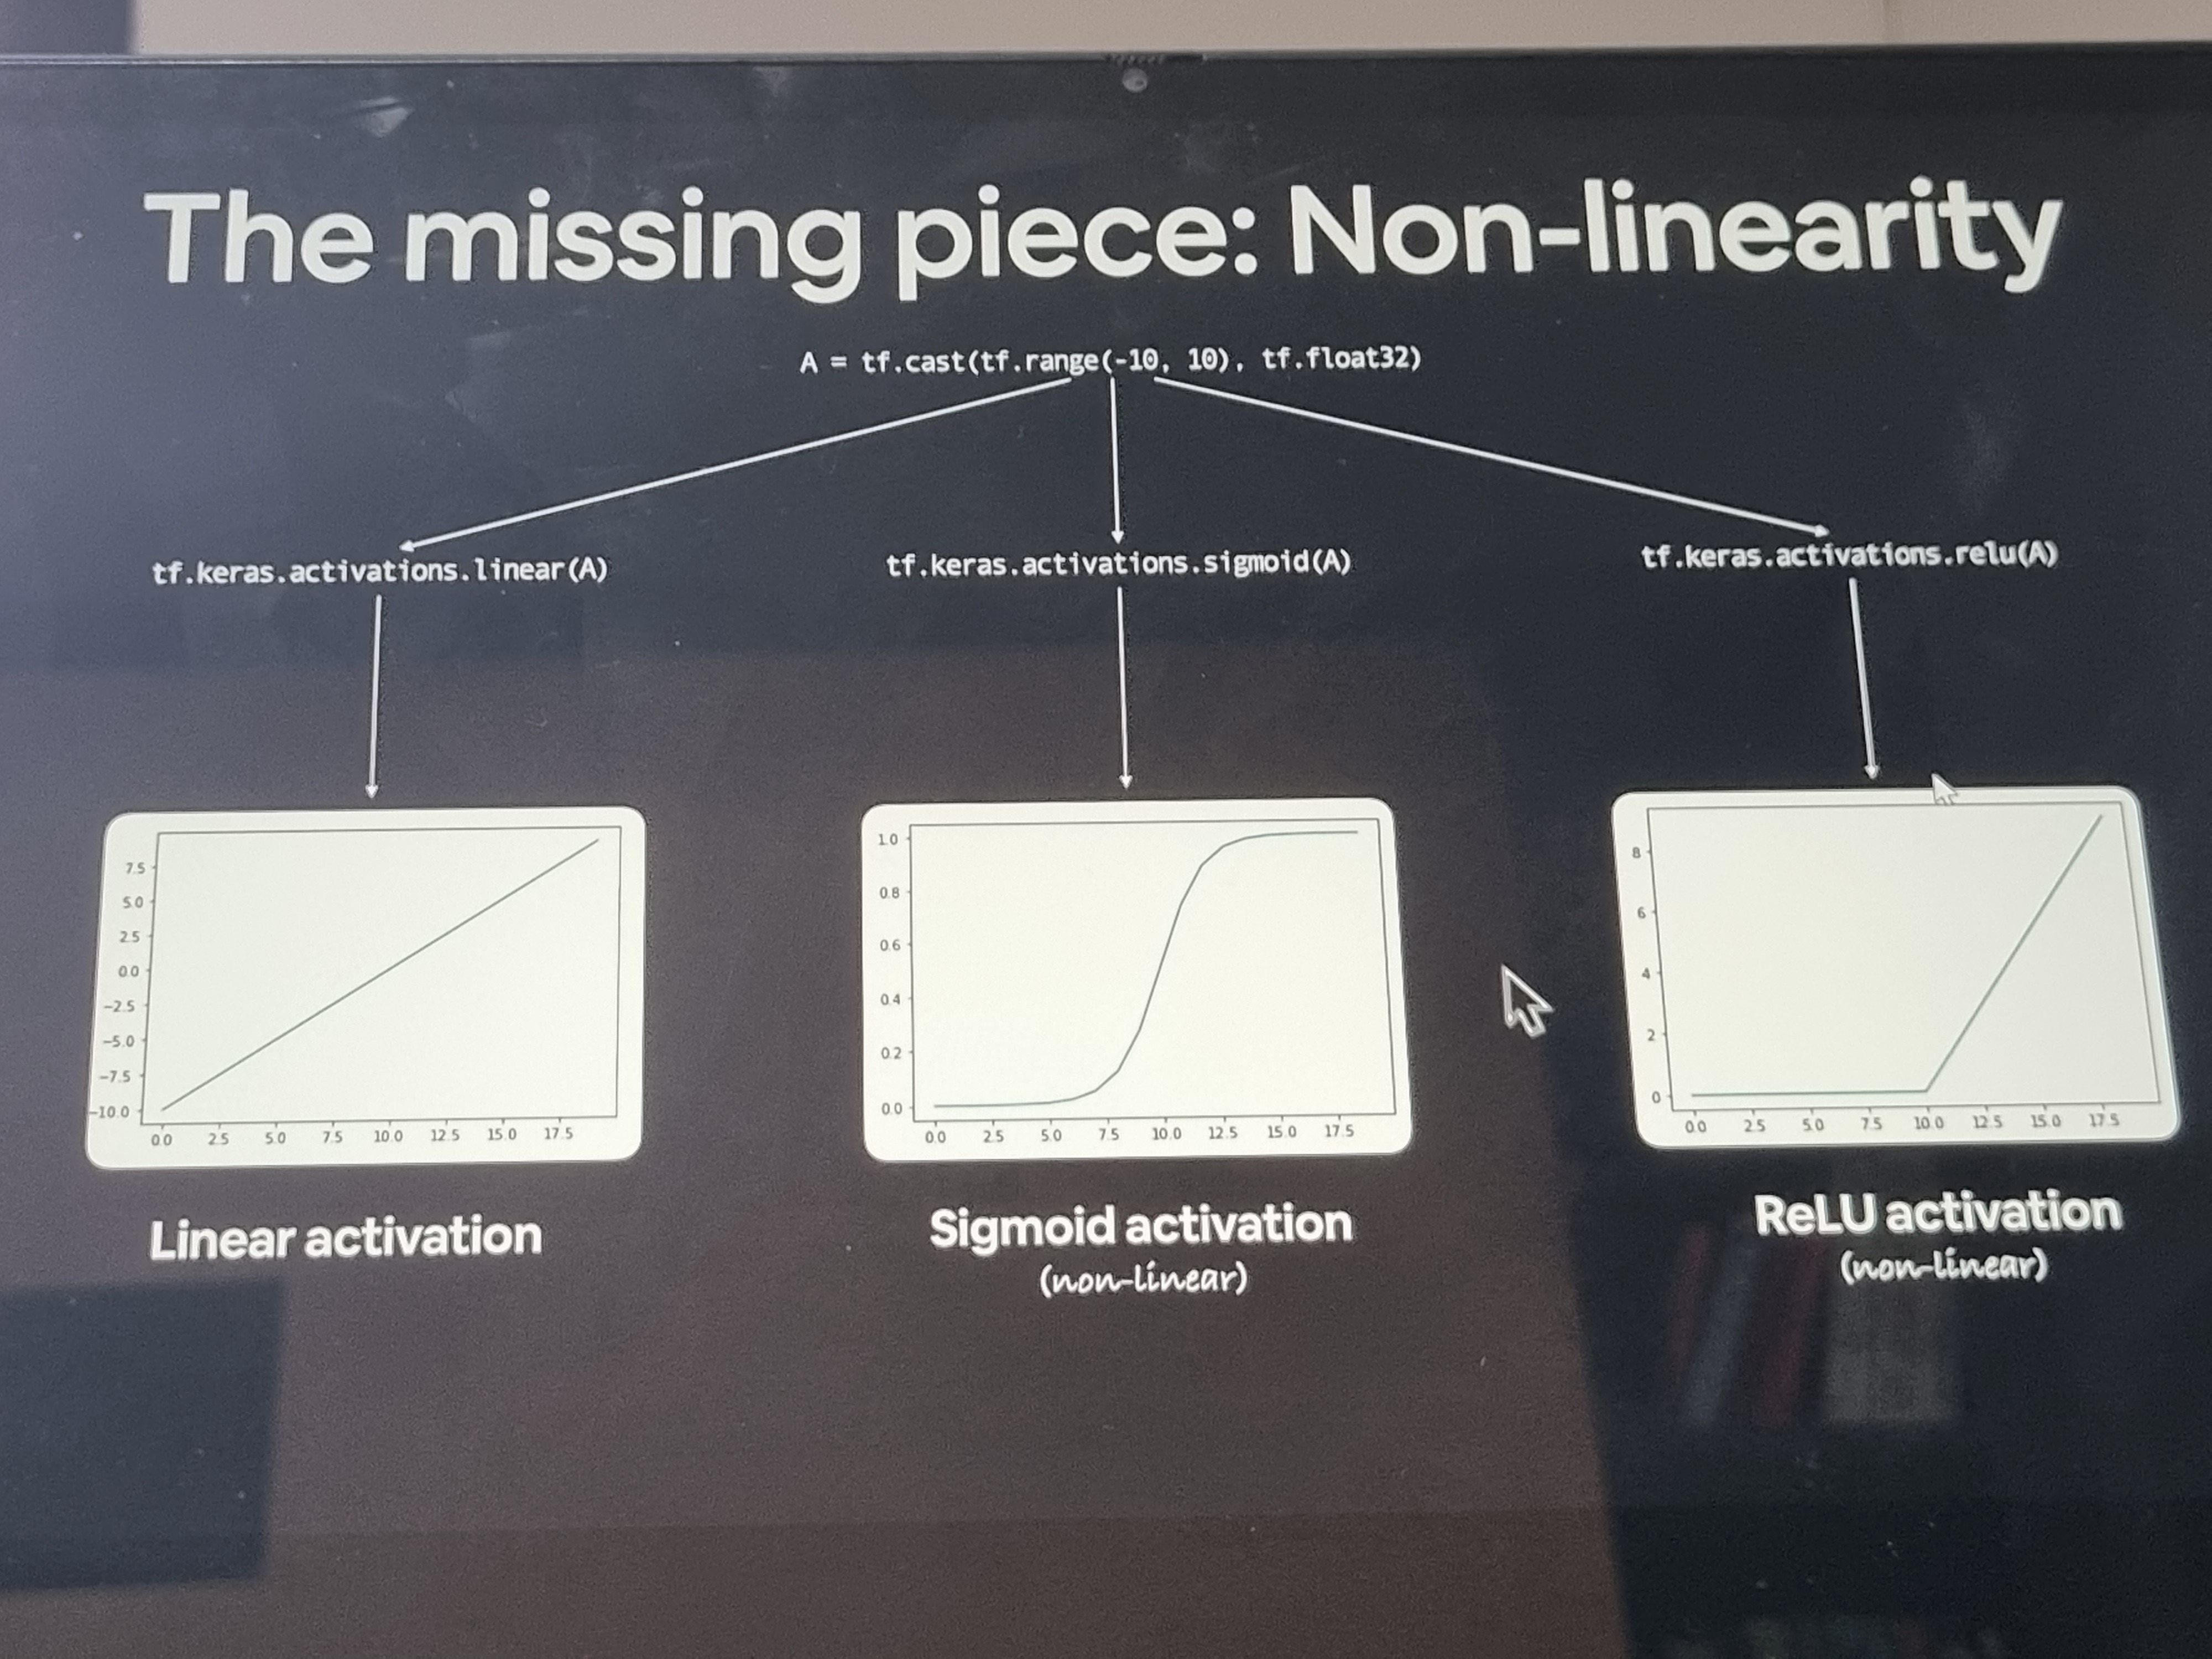

In [ ]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="tanh"),
    tf.keras.layers.Dense(4, activation="tanh"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2.Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics="accuracy")

# 3. Fit the model
model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 6ms/step - loss: 0.6978 - accuracy: 0.5110
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5300
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.5470
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.5850
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6863 - accuracy: 0.5670
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6831 - accuracy: 0.5670
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6817 - accuracy: 0.5930
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6774 - accuracy: 0.5720
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6750 - accuracy: 0.5850
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6677 - accuracy: 0.5700
Epoch 11/

In [ ]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 5ms/step - loss: 0.0075 - accuracy: 1.0000


[0.007508531212806702, 1.0]

313/313 [==============================] - 1s 2ms/step
Doing binary classification


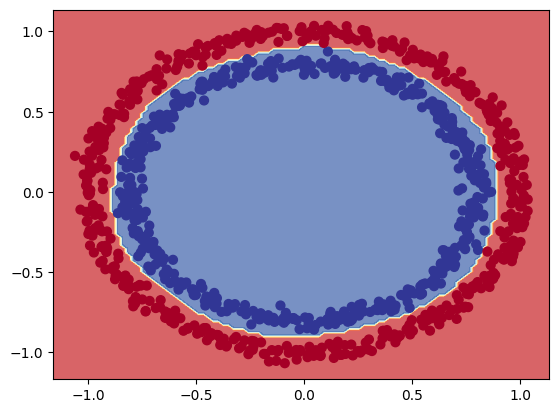

In [ ]:
plot_decision_boundary(model_7, X, y)

**IMPORTANT NOTE TO TAKE IN CONSIDERATION:**

### The models we've created are all training and testing in the same values (There is no seperate train and test sets).

#Splitting the data into train and test

## There are two ways to split the data
1. Use indexing
2. Use split_train_test function

### Split the data into training and testing sets

In [ ]:
# Split the data using indexing

X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [ ]:
# Visulize the splitting sets
X_train, X_test

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.64889467, -0.51222194],
        [-0.18878747,  0.74504113],
        [-0.27333143, -0.70507331]]),
 array([[ 6.19725230e-01,  5.06557203e-01],
        [ 6.47077518e-01, -3.64208423e-01],
        [ 4.18714630e-01,  6.84282939e-01],
        [-6.56306805e-01, -4.35764494e-01],
        [ 4.73864310e-01,  8.21235342e-01],
        [-9.85049067e-01,  1.18959505e-01],
        [-6.67864722e-01,  4.81669594e-01],
        [-4.13239724e-01,  9.27643150e-01],
        [ 7.64005728e-01,  1.88843685e-01],
        [ 8.88928919e-01,  4.32518065e-01],
        [ 7.26291194e-01,  3.66873841e-01],
        [-4.70197299e-01,  7.87493733e-01],
        [-3.02040508e-01,  7.44972146e-01],
        [ 1.43882577e-01, -8.22794070e-01],
        [-1.65980756e-01, -7.68488677e-01],
        [-2.74275495e-01, -7.41031770e-01],
        [ 5.97240716e-01, -5.66165658e-01],
        [-8.03313695e

In [ ]:
# Visulize the splitting sets
y_train, y_test

(array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 

### Create a new model with the new data sets

In [ ]:
# Set a random seed
tf.random.set_seed(42)

# 1.Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics="accuracy")

# 3.Fit the model
history = model_8.fit(X_train, y_train, epochs=50)


Epoch 1/50
25/25 [==============================] - 2s 4ms/step - loss: 0.6848 - accuracy: 0.5500
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6755 - accuracy: 0.6500
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6662 - accuracy: 0.6162
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6546 - accuracy: 0.6363
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6374 - accuracy: 0.6413
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6101 - accuracy: 0.6888
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5799 - accuracy: 0.7563
Epoch 8/50
25/25 [==============================] - 0s 4ms/step - loss: 0.5527 - accuracy: 0.7487
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5037 - accuracy: 0.8475
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4610 - accuracy: 0.8913
Epoch 11/50
25/25 [

In [ ]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 7ms/step - loss: 0.0236 - accuracy: 0.9950


[0.023599976673722267, 0.9950000047683716]

#### Notes on model_8
We duplicated model_7 and made some tiny adjustments such as:
1. Tweaking the learning rate so the model improve its weight in each epochs by 10 times more than the default learning rate - 0.001 -
2. Fit the model on the training sets and evaluate it on the testing sets
3. Decrease the epochs beacuse we've increased the learning rate - Not essentail to do so but we wanted to see the learning rate's effect -

313/313 [==============================] - 1s 3ms/step
Doing binary classification
313/313 [==============================] - 1s 2ms/step
Doing binary classification


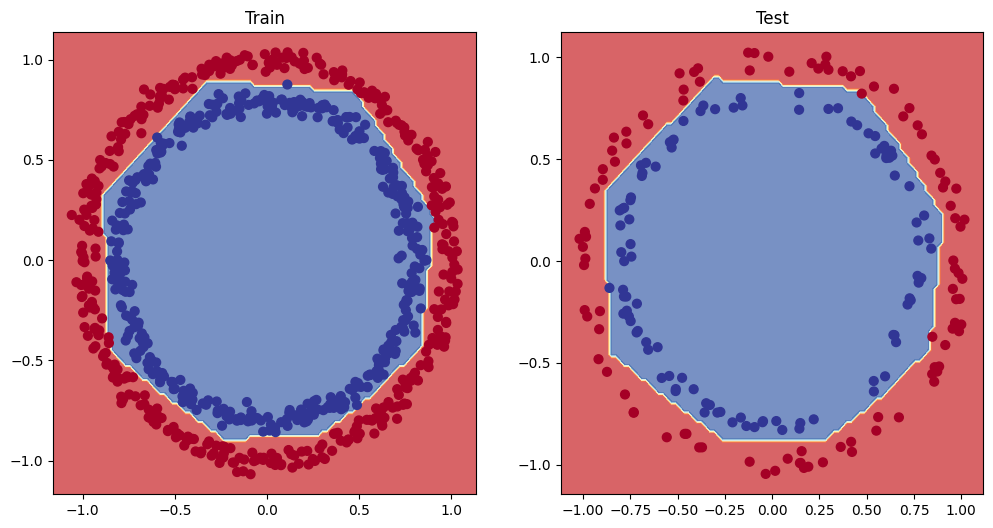

In [ ]:
# Plot our decision boundries for train and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model=model_8, X=X_test, y=y_test)

# Playing around with the fit method using history method

**History method tracks the outputs of each epochs**

### Plot the loss (or training) curves

In [ ]:
history.history

{'loss': [0.6847997307777405,
  0.6754618287086487,
  0.6661734580993652,
  0.6545625329017639,
  0.637359082698822,
  0.6100835204124451,
  0.5798720717430115,
  0.5526883602142334,
  0.50370192527771,
  0.4609612226486206,
  0.4124038815498352,
  0.3510760962963104,
  0.3024033308029175,
  0.2624868154525757,
  0.22296802699565887,
  0.1927146315574646,
  0.17070356011390686,
  0.15243710577487946,
  0.13998708128929138,
  0.1273515671491623,
  0.11139049381017685,
  0.09971355646848679,
  0.09156892448663712,
  0.08618681877851486,
  0.08001753687858582,
  0.07693994790315628,
  0.06651230901479721,
  0.062017712742090225,
  0.05781499296426773,
  0.057208310812711716,
  0.05408714711666107,
  0.05281677842140198,
  0.048405442386865616,
  0.04468369856476784,
  0.042643751949071884,
  0.04119744151830673,
  0.03963090106844902,
  0.036997973918914795,
  0.03648246452212334,
  0.03780374303460121,
  0.03572744503617287,
  0.03518303111195564,
  0.035568688064813614,
  0.031891681253

In [ ]:
# Convert the history object into a dataframe
pd.DataFrame(history.history)

loss  accuracy
0   0.684800   0.55000
1   0.675462   0.65000
2   0.666173   0.61625
3   0.654563   0.63625
4   0.637359   0.64125
5   0.610084   0.68875
6   0.579872   0.75625
7   0.552688   0.74875
8   0.503702   0.84750
9   0.460961   0.89125
10  0.412404   0.91500
11  0.351076   0.96000
12  0.302403   0.98500
13  0.262487   0.98750
14  0.222968   0.98250
15  0.192715   0.99125
16  0.170704   0.99375
17  0.152437   0.99625
18  0.139987   0.99000
19  0.127352   0.99250
20  0.111390   0.99625
21  0.099714   0.99750
22  0.091569   0.99375
23  0.086187   0.99500
24  0.080018   0.99625
25  0.076940   0.99250
26  0.066512   0.99625
27  0.062018   0.99875
28  0.057815   0.99625
29  0.057208   0.99250
30  0.054087   0.99750
31  0.052817   0.99375
32  0.048405   0.99125
33  0.044684   0.99625
34  0.042644   0.99750
35  0.041197   0.99750
36  0.039631   0.99500
37  0.036998   0.99875
38  0.036482   0.99750
39  0.037804   0.99375
40  0.035727   0.99875
41  0.035183   0.99625
42  0.035569   0.99625
43  0.031892   0.99500
44  0.030231   0.99625
45  0.031297   0.99750
46  0.029172   0.99750
47  0.030952   0.99750
48  0.026373   0.99875
49  0.026983   0.99875

Text(0.5, 1.0, 'Model_8 loss curves')

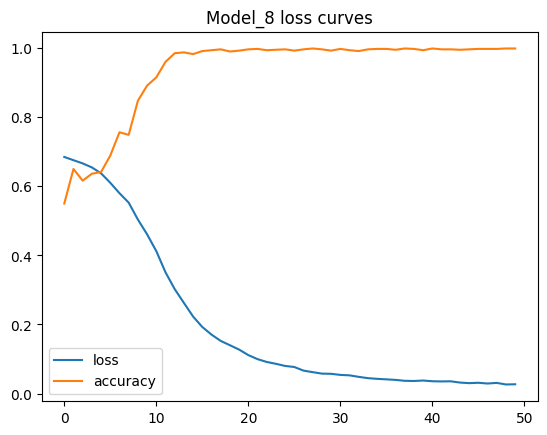

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

# Finding the ideal learning rate

The ideal learning rate is where the loss decreases the most during training.
To do that we need to:
* Use a learning rate callback - It's an extra piece of functionality you can add while its training
* Create anothe model and add the callback

### Create a new model (model_9) but with a callback method added

In [ ]:
# Set a random seed
tf.random.set_seed(42)

# 1. Create a model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics="accuracy")

# 3. Create a callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

# 4. Fit the model
history_9 =model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 5s 4ms/step - loss: 0.6891 - accuracy: 0.5100 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6889 - accuracy: 0.5075 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6887 - accuracy: 0.5088 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6885 - accuracy: 0.5163 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6883 - accuracy: 0.5288 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6880 - accuracy: 0.5400 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6878 - accuracy: 0.5412 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6875 - accuracy: 0.5362 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

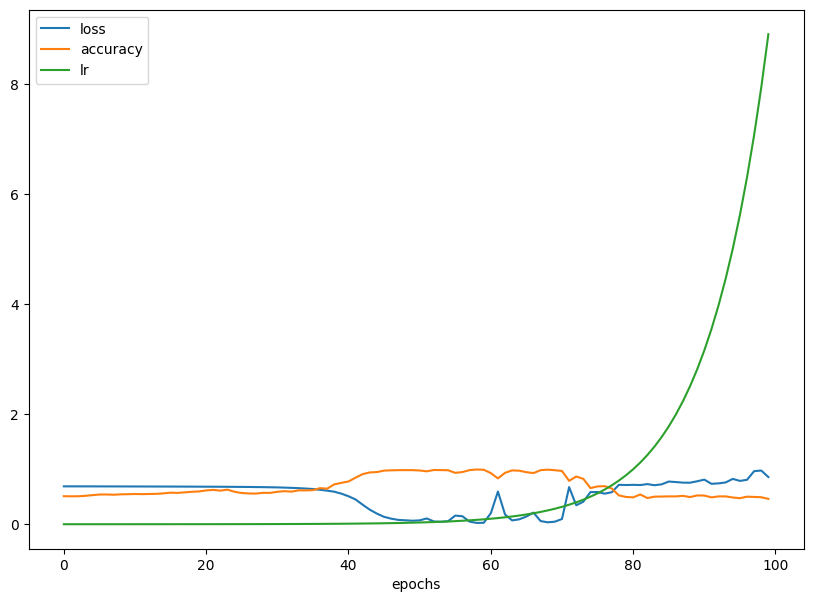

In [ ]:
# Check out the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs");

Text(0.5, 1.0, 'Learning rater VS Loss')

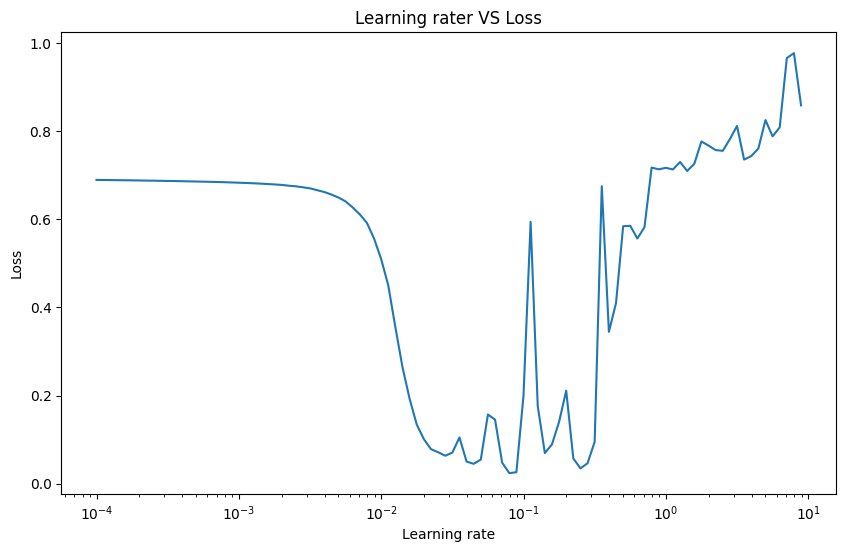

In [ ]:
# Plot the learning rate VS the loss
lrs = 1e-4 * 10 **(tf.range(100)/20) # 100 represents the number of epochs
plt.figure(figsize=(10, 6))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rater VS Loss")

**NOTE**: As we can see above the less loss is the most ideal learning rate ( In this case between 10-2 and 10-1 )

# Create an **ideal** learning rate model.

( Same model as model_8 )

In [ ]:
# Set a random seed
tf.random.set_seed(42)

# 1. Create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model with the ideal lr found in the pic above
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics="accuracy")

# 3. Fit the model for 45 epochs(less than 5 epochs bc we've increased the lr)
model_10.fit(X_train, y_train, epochs=45)

Epoch 1/45
25/25 [==============================] - 3s 4ms/step - loss: 0.7075 - accuracy: 0.4650
Epoch 2/45
25/25 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4988
Epoch 3/45
25/25 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.4963
Epoch 4/45
25/25 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.5013
Epoch 5/45
25/25 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5013
Epoch 6/45
25/25 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.4963
Epoch 7/45
25/25 [==============================] - 0s 5ms/step - loss: 0.6929 - accuracy: 0.5063
Epoch 8/45
25/25 [==============================] - 0s 5ms/step - loss: 0.6935 - accuracy: 0.5013
Epoch 9/45
25/25 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5013
Epoch 10/45
25/25 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.4938
Epoch 11/45
25/25 [

In [ ]:
# Evaluate the model_10
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5050


[0.6931230425834656, 0.5049999952316284]

In [ ]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.0236 - accuracy: 0.9950


[0.023599976673722267, 0.9950000047683716]

**IMPORTANT NOTE**: By finding the ideal learning rate and adjust it our model performed better even in a less number of epochs

### Polt the decision boundries of model_10


313/313 [==============================] - 1s 3ms/step
Doing binary classification
313/313 [==============================] - 2s 5ms/step
Doing binary classification


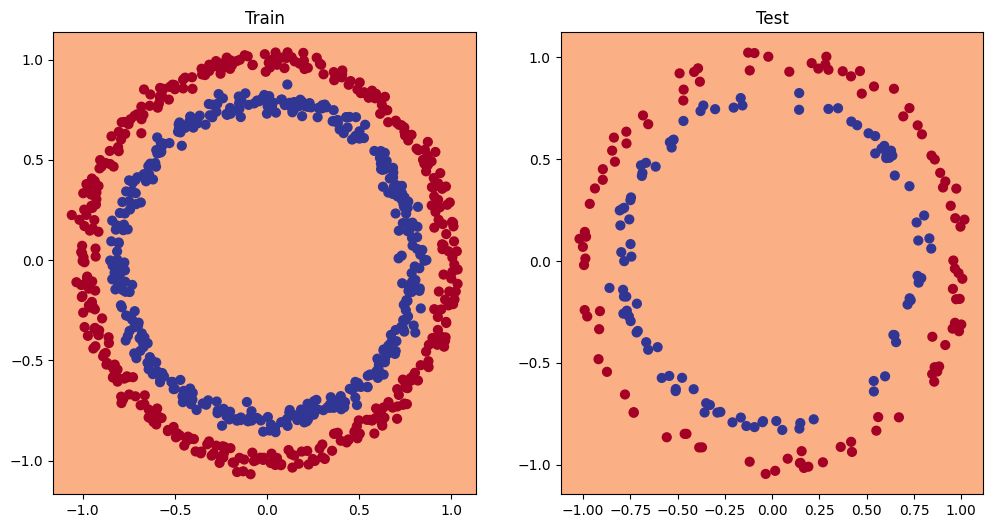

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # This basically means 1 output row, 2 colunms, this the section 1 (in the left hand) CAN BE CHANGED
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2) #This basically means 1 output row, 2 colunms, this the section 1 (in the right hand) CAN BE CHANGED
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)


# Evaluation Methods

There are some other evaluation methods that we're going to look at. Refer to the picture below:

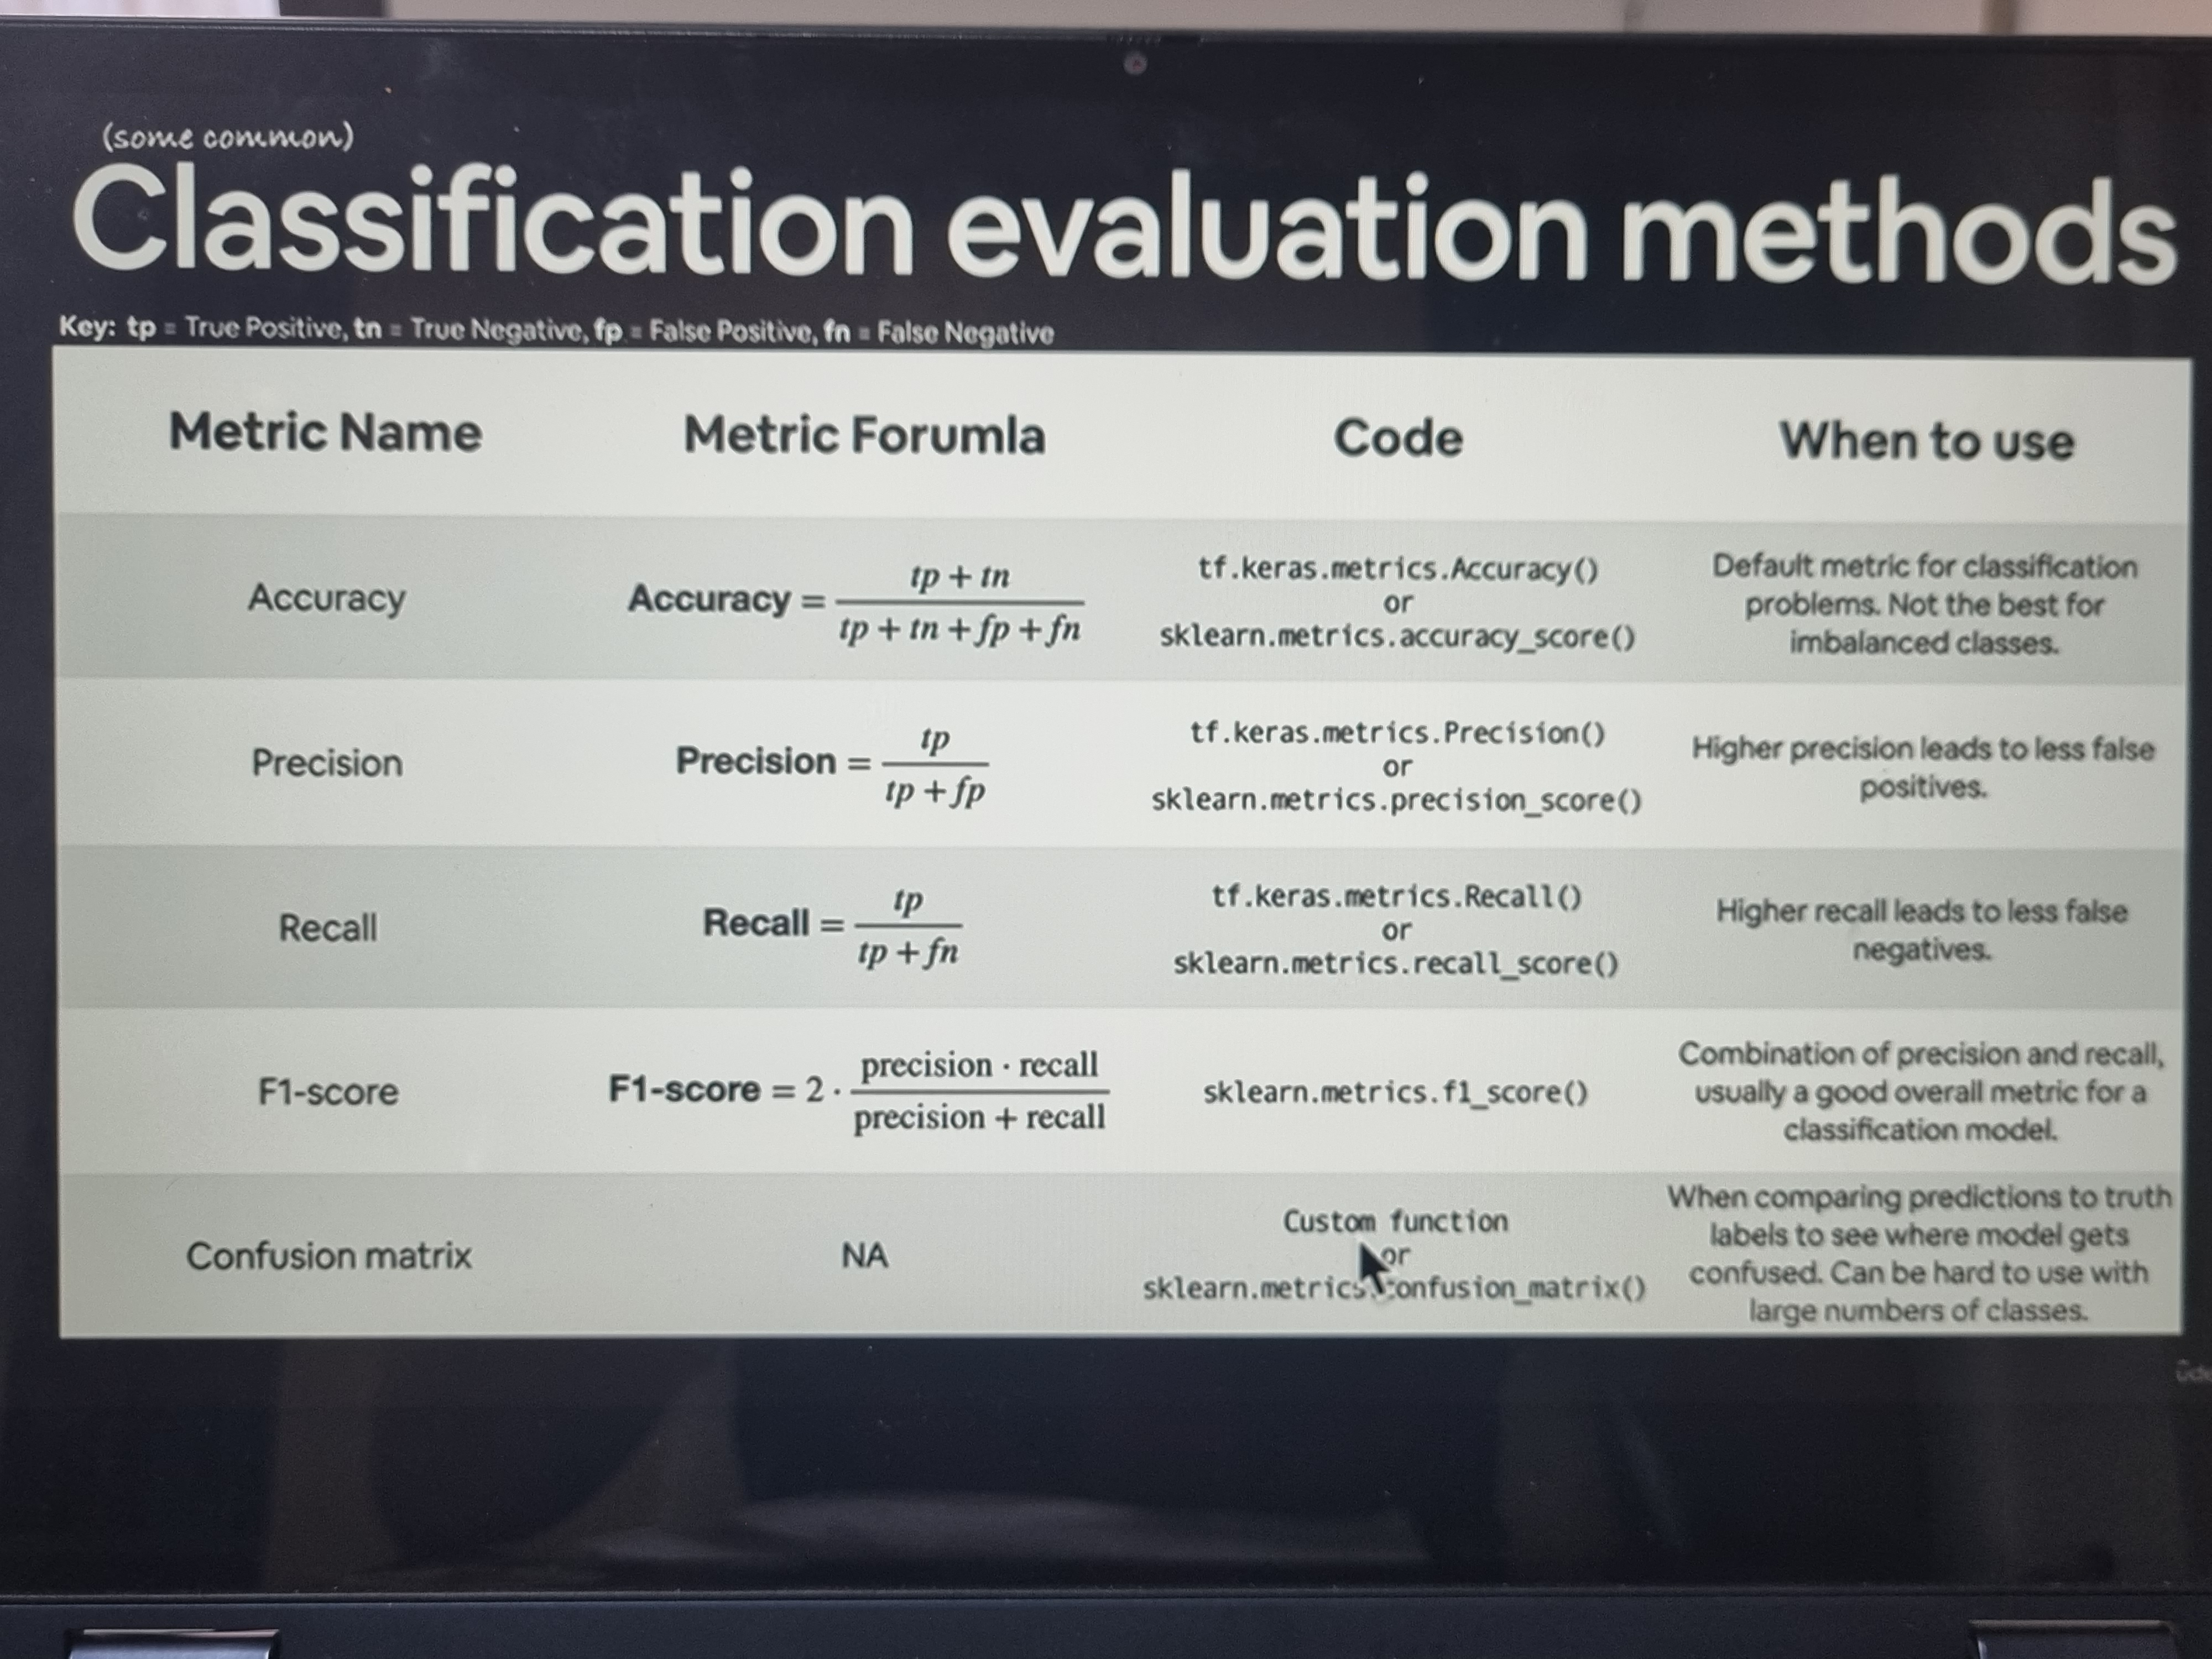

### Accuracy

In [ ]:
# Check the accuracy of our model

loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test data: {loss}")
print(f"Model accuracy on test data: {(accuracy * 100):.2f}%")

7/7 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5050
Model loss on test data: 0.6931230425834656
Model accuracy on test data: 50.50%


### Confusion Matrix

#### You can deep more in this method by reading the article [link text](https://machinelearningmastery.com/confusion-matrix-machine-learning/)

In [ ]:
from sklearn.metrics import confusion_matrix # There is a build in function already

# Make predicions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [ ]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_preds[:10]

array([[0.4985904],
       [0.4985904],
       [0.4985904],
       [0.4985904],
       [0.4985904],
       [0.4985904],
       [0.4985904],
       [0.4985904],
       [0.4985904],
       [0.4985904]], dtype=float32)

#### The above problem ocuures because the y_test is 0s or 1s, while y_preds is a continuos numbers

In [ ]:
# Convert our y_preds to binary output(0s or 1s)
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)>

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[101,   0],
       [ 99,   0]])

#### Prettify our confusion matrix

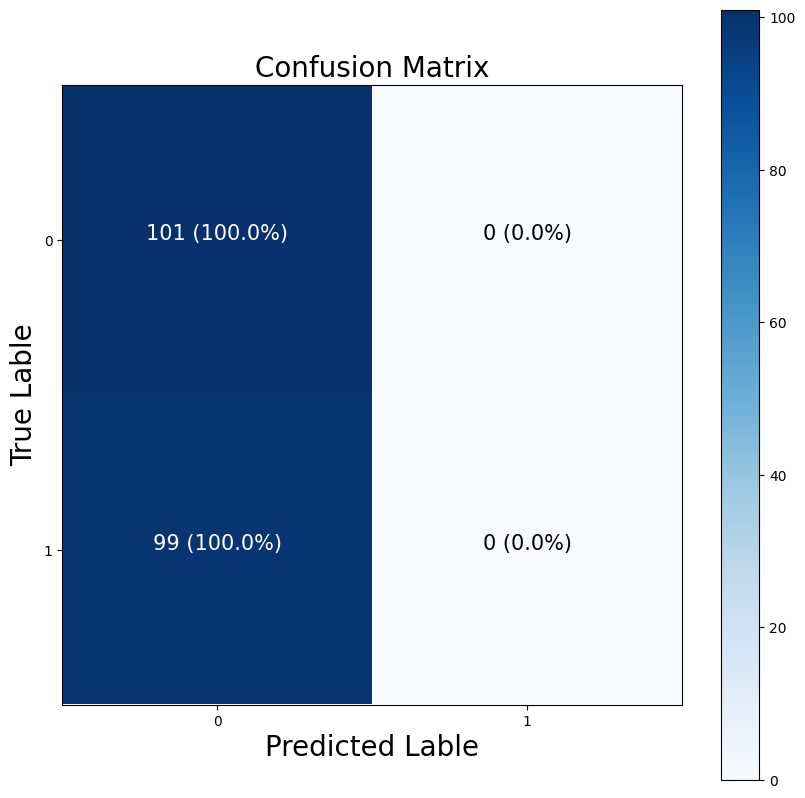

In [ ]:
from keras.layers.preprocessing.image_preprocessing import HORIZONTAL
import itertools

figsize = (10, 10)

# Create a confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize
n_classes = cm.shape[0]

# Prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False
if classes:
  lables=classes
else:
  lables = np.arange(cm.shape[0])

# Lable the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Lable",
       ylabel="True Lable",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=lables,
       yticklabels=lables)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i ,f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color ="white" if cm[i, j] >threshold else "black",
           size=15)

# Working with a large example (Multiclass Classification)


### To practice multi-class classification, we're going to build a neural network to classify different clothing images.
Our data is retrived form [DataSet](https://www.tensorflow.org/datasets/catalog/fashion_mnist)

In [ ]:
# Start from scratch

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist # A ready dataset splitted into training and test data

# Load out data
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training labels:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

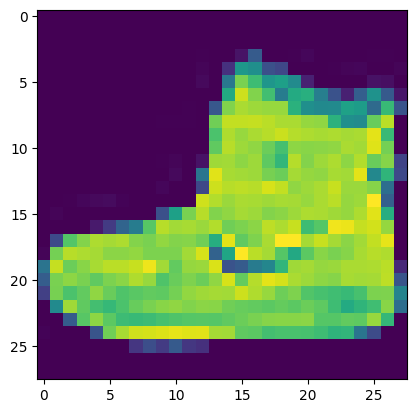

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [ ]:
# Check out what is the above sample's label
train_labels[0] # In the docs you can see that number 9 in the training labels refers to an ankle boot

9

In [ ]:
# Create a list containing our training labels so they become human-readable

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Snadal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


Text(0.5, 1.0, 'Ankle boot')

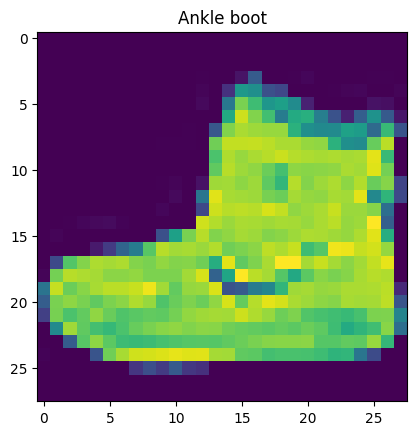

In [ ]:
# Plot an example with its title
plt.imshow(train_data[0])
plt.title(class_names[train_labels[0]])

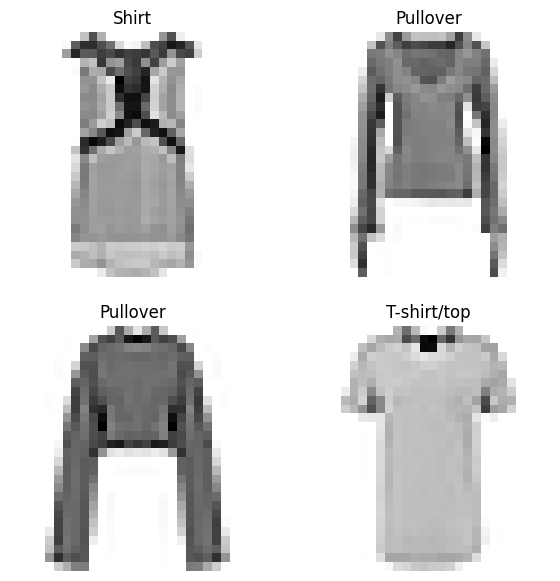

In [ ]:
# Plot multiple random images at one time
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data))) # Pick random nums
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary) # Make images black and white
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False) # Don't want numbers in the edge

# Building a multi-class calssification model

### We can use the same architecture to our binary classification, however we'll tweak a few things:
* Input shape = 28 x 28 (shape of one image) "train_data[0].shape"
  - It is recommended to use "tf,keras.layers.Flatten(input_shape=(xx, xx))", in case any shape errors
* Output shape = 10 (one per calss of clothing) "len(class_names)"
* Loss function =
  - If your labels are one-hot encoded use CategoricalCrossentropy().
  - If your labels are an integre form use SpareCategoricalCrossentropy().
* Output layer activation = Softmax(not sigmoid)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Adjust the shapes
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile our model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3159 - accuracy: 0.0981 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [ ]:
# Check the model summary
model_11.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 4)                 3140      
                                                                 
 dense_29 (Dense)            (None, 4)                 20        
                                                                 
 dense_30 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


### Improve performance by normalize (or scaled) our data

#### Normalized (or scaled) data are the data that are between 0 and 1.

In [ ]:
# Check the min amd max values of the training data
train_data.min(), train_data.max()

(0, 255)

#### How to convert our data to normalized data?

In [ ]:
# We can normalize our data by dividing all the data by the maximum value

train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Create a duplicated model as model_11, except the passed data

# set a rndom seed
tf.random.set_seed(42)

# Create a model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics="accuracy")

# Fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7377 - accuracy: 0.3554 - val_loss: 1.4577 - val_accuracy: 0.5173
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3260 - accuracy: 0.5312 - val_loss: 1.2512 - val_accuracy: 0.5367
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1804 - accuracy: 0.5610 - val_loss: 1.1556 - val_accuracy: 0.5825
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1057 - accuracy: 0.5942 - val_loss: 1.1052 - val_accuracy: 0.6190
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0342 - accuracy: 0.6641 - val_loss: 1.0251 - val_accuracy: 0.6745
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9472 - accuracy: 0.7040 - val_loss: 0.9536 - val_accuracy: 0.7089
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8988 - accuracy: 0.7103 - val_loss: 0.9133 - val_accuracy:

#### Plot loss curves

<Axes: title={'center': 'Normalized data'}>

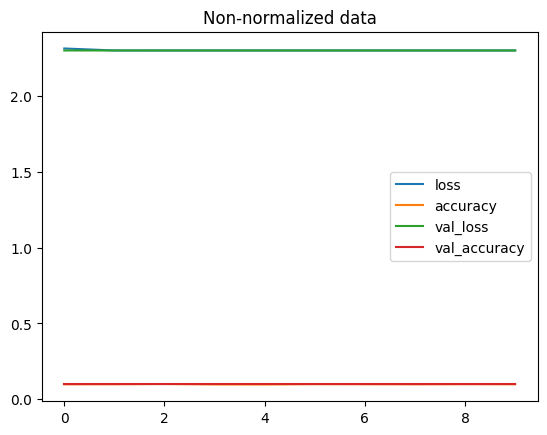

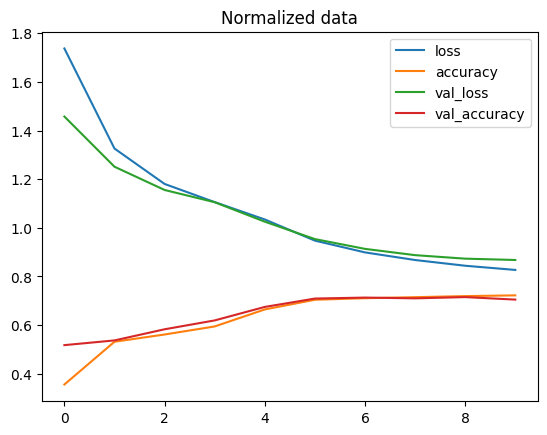

In [ ]:
import pandas as pd

# Plot non-normalized data loss curve
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")

# Plot normalized data loss curve
pd.DataFrame(norm_history.history).plot(title="Normalized data")

#### Finding the ideal learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics="accuracy")

# Create a callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=(lr_scheduler))

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2230 - accuracy: 0.5087 - val_loss: 0.8864 - val_accuracy: 0.6342 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8141 - accuracy: 0.6669 - val_loss: 0.7549 - val_accuracy: 0.7072 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6446 - accuracy: 0.7534 - val_loss: 0.6258 - val_accuracy: 0.7707 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5788 - accuracy: 0.7949 - val_loss: 0.5981 - val_accuracy: 0.7879 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5539 - accuracy: 0.8066 - val_loss: 0.5807 - val_accuracy: 0.7930 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5375 - accuracy: 0.8135 - val_loss: 0.5809 - val_accuracy: 0.8020 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding Ideal Learning rate')

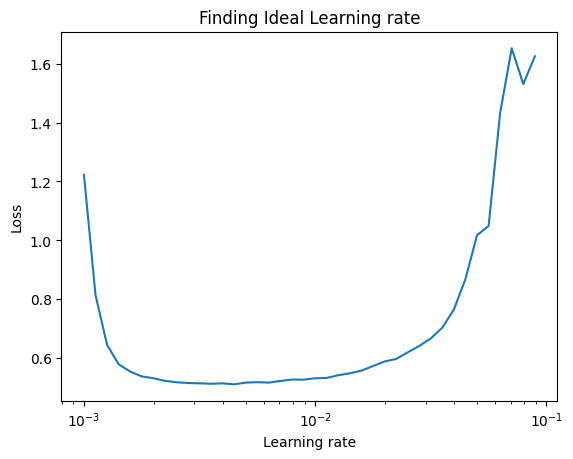

In [ ]:
import numpy as np
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding Ideal Learning rate")

> As seen above the ideal learning rate could be 10**-2 (0.01), so we'll create another model with this learning rate

#### Create a model with the ideal learning rate


In [ ]:
# Set a random seed
tf.random.set_seed(42)

# Create a model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics="accuracy")

# Fit the model
hsitory_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=40,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3038 - accuracy: 0.1012 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3040 - accuracy: 0.0975 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3040 - accuracy: 0.0993 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3040 - accuracy: 0.0998 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3039 - accuracy: 0.0998 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3039 - accuracy: 0.1002 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 7/40
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3040 - accuracy: 0.0978 - val_loss: 2.3031 - val_accuracy:

#### Evaluating our multi-class classification model

we could evaluate our model by:
* Evalute its performance using other classification metricsn (such as confusion metrics)
* Assess some of its predictions (through visulaization)
* Improve its results ( by training it for longer or changing the architecture).
* Save and export it for use in an app.




In [ ]:
# Create a confusion metrics

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):

  # Create a confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize
  n_classes = cm.shape[0]

  # Prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  # Set lables to be classes
  if classes:
    lables=classes
  else:
    lables = np.arange(cm.shape[0])

  # Lable the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Lable",
        ylabel="True Lable",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=lables,
        yticklabels=lables)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i ,f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color ="white" if cm[i, j] >threshold else "black",
            size=text_size)

In [ ]:
# Make some predictions
y_probs = model_14.predict(test_data_norm)

# Veiw the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[0.10869999, 0.10566533, 0.09571911, 0.10033353, 0.10514435,
        0.09774528, 0.09870826, 0.09802384, 0.09395247, 0.09600794],
       [0.10869999, 0.10566533, 0.09571911, 0.10033353, 0.10514435,
        0.09774528, 0.09870826, 0.09802384, 0.09395247, 0.09600794],
       [0.10869999, 0.10566533, 0.09571911, 0.10033353, 0.10514435,
        0.09774528, 0.09870826, 0.09802384, 0.09395247, 0.09600794],
       [0.10869999, 0.10566533, 0.09571911, 0.10033353, 0.10514435,
        0.09774528, 0.09870826, 0.09802384, 0.09395247, 0.09600794],
       [0.10869999, 0.10566533, 0.09571911, 0.10033353, 0.10514435,
        0.09774528, 0.09870826, 0.09802384, 0.09395247, 0.09600794]],
      dtype=float32)

In [ ]:
# View the first prediction and its highest probabality
y_probs[0], tf.argmax(y_probs[0]) # Its highest probablity is class name No.9

(array([0.10869999, 0.10566533, 0.09571911, 0.10033353, 0.10514435,
        0.09774528, 0.09870826, 0.09802384, 0.09395247, 0.09600794],
       dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=0>)

In [ ]:
# See what is the class name no.9
class_names[tf.argmax(y_probs[0])]

'T-shirt/top'

In [ ]:
# Convert all of the prediction probablities into integers
y_preds = y_probs.argmax(axis=1) # Axis =1 bc we want it to find the maximum value for each row of the array

# View the first 10 prediction lables
y_preds[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0]])

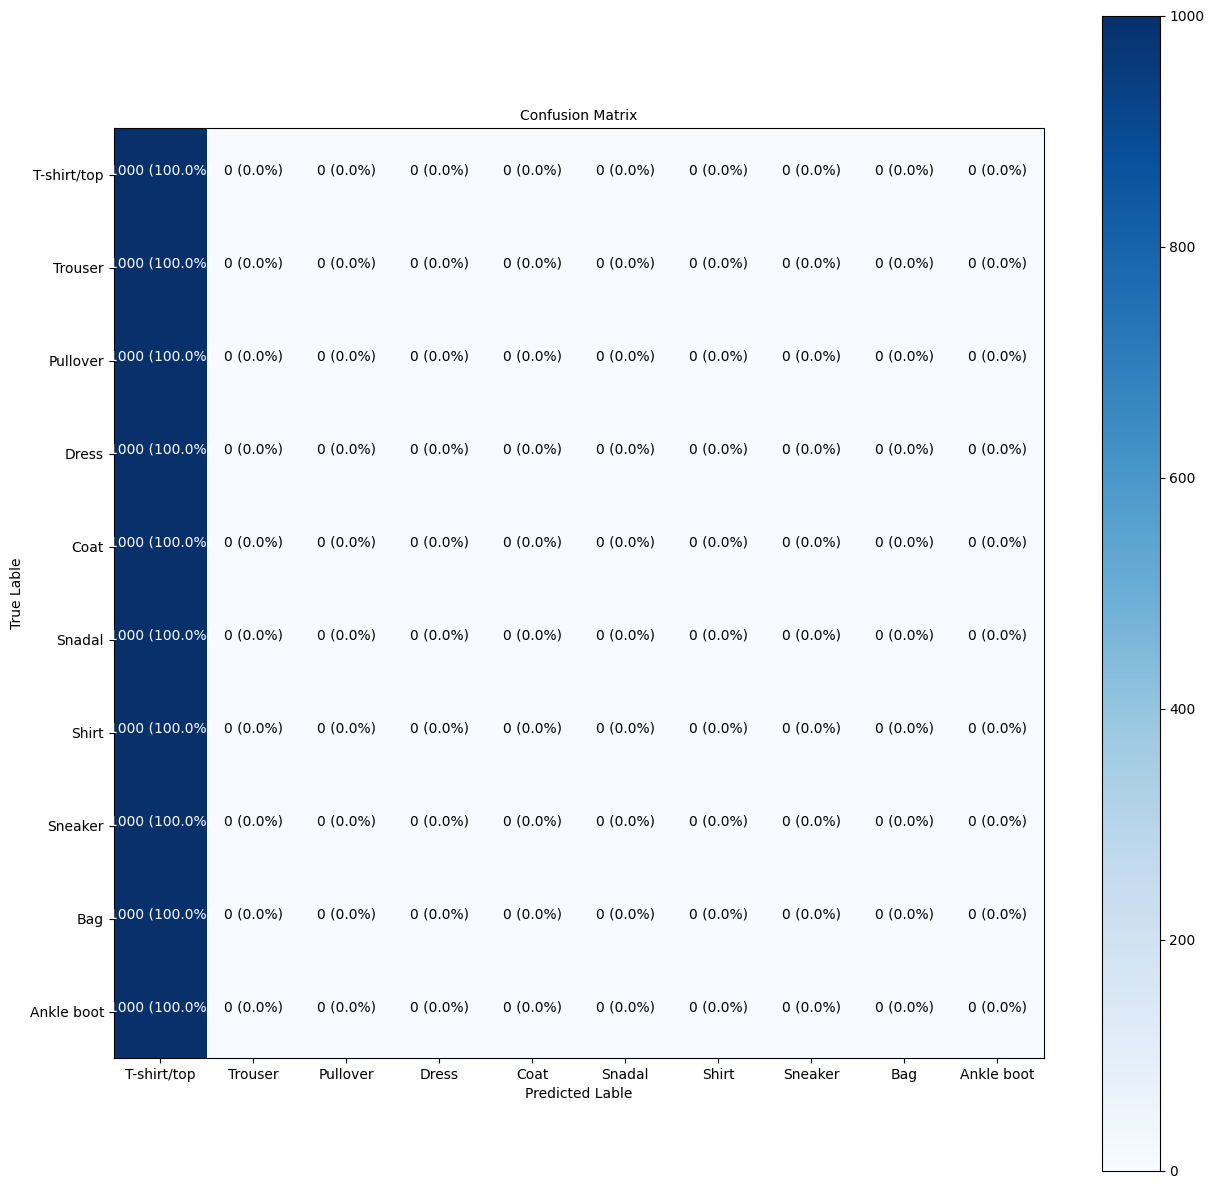

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

# Create a function to pick a random image
> The function will:
* Pick a random image
* Make a prediction on that image
* Label the plot with the truth label & the predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Pick a random image, plots it and labels it with the predicted and truth labels
  """
  # Pick a random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the title color based on if the prediction true or false
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information
  plt.xlabel("pred: {} {:2.0f}% (True: {})".format(pred_label,
                                              100*tf.reduce_max(pred_probs),
                                              true_label),
             color=color)

1/1 [==============================] - 0s 21ms/step


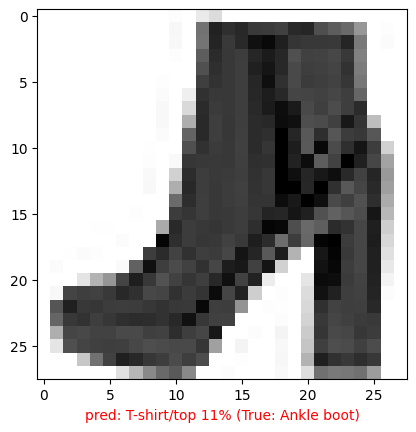

In [ ]:
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

# What patterns is our model learning?

In [ ]:
# Find the layers of our most recent model
model_14.layers

In [ ]:
# Extract a particular layer
model_14.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

In [ ]:
# Bias and biases shapes
biases, biases.shape

(array([-0.06004821,  0.05905863, -0.06003948, -0.01743927], dtype=float32),
 (4,))

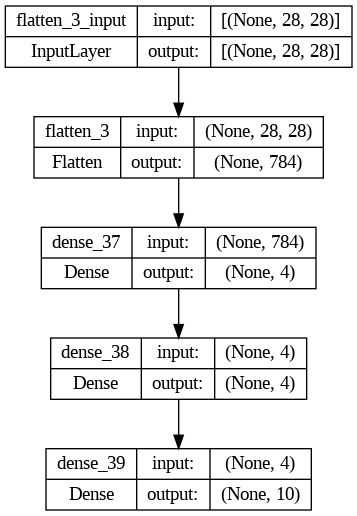

In [ ]:
# Another way to view deep learning model
from tensorflow.keras.utils import plot_model

# See the inputs and outputs if each layers
plot_model(model_14, show_shapes=True)